# Problem Statement 1

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

To make prediction for primary fuel and capacity_mw based on provided dataset.

# Key Attributes

Given dataset contains the following variables

1. country : 3 character country code corresponding to the ISO 3166-1 alpha-3 specification.
2. country_long : long form of the country designation
3. name: name or title of the power plant
4. gppd_idnr: 10 or 12 character identifier for the power plant
5. capacity_mw: electrical generating capacity in megawatts
6. latitude: geolocation in decimal degrees; WGS84 (EPSG:4326)
7. longitude: geolocation in decimal degrees; WGS84 (EPSG:4326)
8. primary_fuel: energy source used in primary electricity generation or export
9. other_fuel1: energy source used in electricity generation or export
10.other_fuel2: energy source used in electricity generation or export 
11.other_fuel3: energy source used in electricity generation or export
12.commissioning_year : year of plant operation,weighted by unit-capacity when data is available.
13.year_of_capacity_data: year the capacity information was reported
14.Owner : majority share holder of the power plant
15.Source : entity reporting the data
16.url : web document corresponding to the source field
17.geolocation_source : attribution for geolocation information
18.wepp_id : a reference to a unique plant identifier in the widely-used PLATTS-WEPP database
19.generation_gwh_2013: electricity generation in gigawatt-hours reported for the year 2013
20.generation_gwh_2014: electricity generation in gigawatt-hours reported for the year 2014
21.generation_gwh_2015: electricity generation in gigawatt-hours reported for the year 2015
22.generation_gwh_2016: electricity generation in gigawatt-hours reported for the year 2016
23.generation_gwh_2017: electricity generation in gigawatt-hours reported for the year 2017
24.generation_gwh_2017: electricity generation in gigawatt-hours reported for the year 2018
25.generation_gwh_2017: electricity generation in gigawatt-hours reported for the year 2019
26.generation_data_source: attribution for the reported generation information
27.estimated_generation_gwh : estimated annual electricity generation in gigawatt-hours


To make prediction for 1) Primary fuel and 2)capacity_mw 

# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("No. of Rows : ",df.shape[0])
print("No. of Columns : ",df.shape[1])
pd.set_option('display.max_columns',None)
df.head()

No. of Rows :  907
No. of Columns :  27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
colllist = df.columns
colllist

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Let's Check for Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

1. Our dataset contains 907 rows and 27 columns.
2. Variables are of float and object type.
3. Some of the columns are totally empty which we will drop. Also there are some features which are not important for prediction.
   We will drop those features also.
4. Features to drop are :
    1. Feature other_fuel2 contains only 1 value.
    2. Feature other_fuel3 has no values.
    3. Feature wepp_id contains all NaN values.
    4. Feature generation_gwh_2013 also contains all NaN values.
    5. Feature generation_gwh_2019  containing all NaN values.
    6. Feature estimated_generation_gwh is also empty column.
    7. Features 'country','country_long' and 'url' are irrelevent features for prediction.
    8. Feature gppd_idnr is a unique identification value which is different for each row.
    9. Feature year_of_capacity_data contains only one unique value.
   10. Feature owner has more than 60% missing data.
So we will drop all these columns before proceeding to next level.

In [7]:
df.drop(columns =['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','country','country_long','url','gppd_idnr','year_of_capacity_data','owner'],axis=1, inplace = True)

In [8]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# Let's check for Null values, whitespaces,'NA', '?', '-' 

In [9]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [10]:
df.isin(['?']).sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [11]:
df.isin([' ','-','NA']).sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

There are no whitespaces, '-','?','NA' present in dataset.
Missing Values :
    1. latitude - 46
    2. longitude - 46
    3. other_fuel1 - 709
    4. commissioning_year - 380
    5. geolocation_source - 19
    6. generation_gwh_2014 - 509
    7. generation_gwh_2015 - 485
    8. generation_gwh_2016 - 473
    9. generation_gwh_2017 - 467
    10. generation_gwh_2018 - 459
    11. generation_data_source - 458   


# Let's check for duplicate entries

In [12]:
df.duplicated().sum()

0

No duplicate entries present in dataset.

# Descriptive Statistics of dataset

In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


from the above brief summary we can say that
1. The highest capacity of power plant is 4760 MW.
2. for each of generation_gwh mean is greater than median.
3. The power plants are located in 8.1689 - 34.6490 latitude range and 68.6447 to 95.40800 longitude range.
4.  The minimum capacity is 0 and median capacity is 59.2 MW. It means that there are some powerplants with lowes capacity.

# Biggest power plant in India

In [14]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [15]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


The Biggest powerplant in India is VINDH_CHAL STPS.
The smallest powerplant in India is Tata BP - Electronics City Solar Panel Plant.

# Handling Of Missing Values

1. We will fill the missing values of latitude and longitude by mean method.
2. Since feature 'geolocation_source' is categorical feature we will fill missing valuesfrom this column by mode.
3. Feature generation_data_source has more than 50% missing values. So its better to drop this feature as well.
4. Missing values in generation_gwh for years 2014-2018:
    . As oil and Gas based powerplant opertaed in intermitant periodic way and some renewable powerplants like wind, tide are         operated seasonally it is natural to have missing data in this category.
    . Since different powerplant have different generation capacity we can not and generation /year depend on runtime of               powerplant we can't replace missing values by mean or median imputation.
        

# Missing Values for 'other_fuel1'

lets take a view on Primary fuel type & ALternate fuel type. 

In [16]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [17]:
pd.crosstab(df['primary_fuel'],df['other_fuel1'],margins=True)

other_fuel1,Cogeneration,Gas,Oil,All
primary_fuel,,,,
Coal,1,0,188,189
Gas,0,0,7,7
Oil,0,2,0,2
All,1,2,195,198


From above information we can see that
1. The alternate fuels for Coal Based powerplant are Cogeneration and Oil.
2. The alternate fuel for Industrial Gas based powerplants is Oil.
3. The alternate fuel for Industrial Oil based powerplants is Gas.
4. We can't define Alternate fuel for Nuclear based powerplantsas it depends on plant design and too many things.
5. Also Renewable energy source powerplants does not needs alternative fuels. So we can impute their NaN values with 
   'Not Applicable' as its categorical feature


# Visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

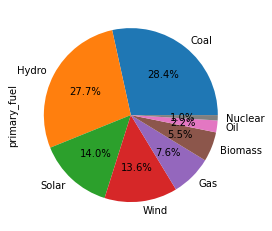

In [18]:
# Visualization of Primary fuel 

df['primary_fuel'].value_counts().plot(kind="pie",autopct='%3.1f%%')
df['primary_fuel'].value_counts()

The above piechart shows that the primary fuel for most of the power plants is Coal follwed by Hydro.
There are very less count of power plants with Nuclear as primary fuel.

# Primary Fuel and capacity_mw


<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

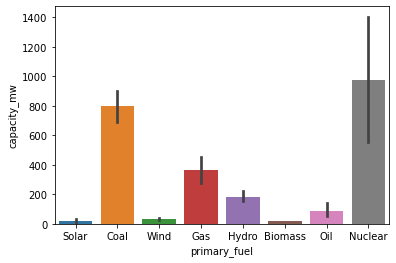

In [19]:
sns.barplot(x='primary_fuel',y='capacity_mw',data=df)

The capacity is high for powerplants with primary fuel as Nuclear.
The power plants with primary fuel as Solar and Biommass and Wind has very less capacity.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

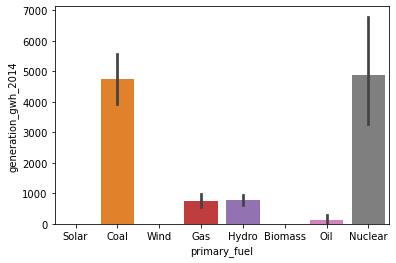

In [20]:
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

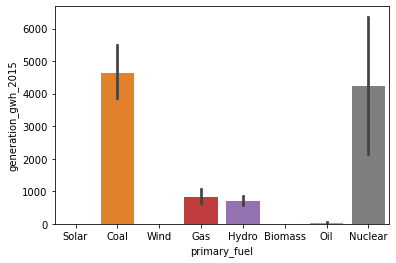

In [21]:
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

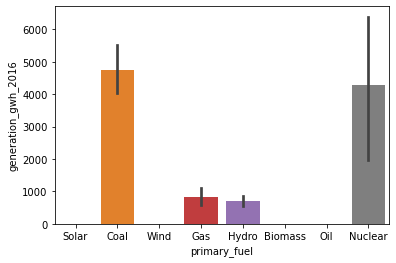

In [22]:
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

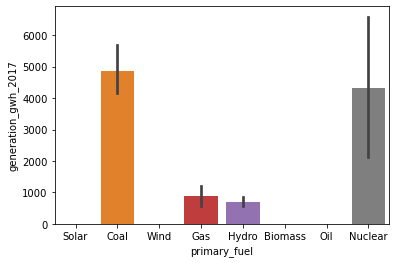

In [23]:
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df)


<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

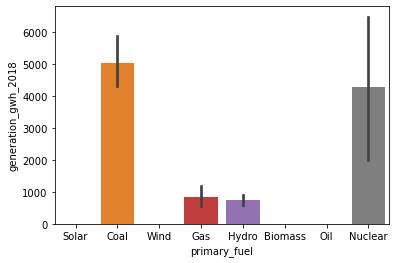

In [24]:
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)


1. From the above plots we can say that the Nuclear and Coal power plants are having high power generation due to their high efficiency
2. The other power plants has very less contribution in power generation.

# Primary Fuel & longitude

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

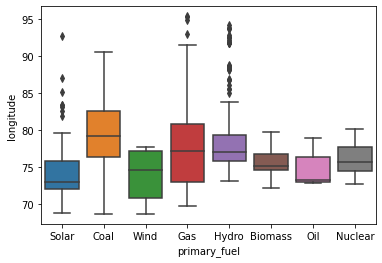

In [25]:
sns.boxplot(df['primary_fuel'],df["longitude"])

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

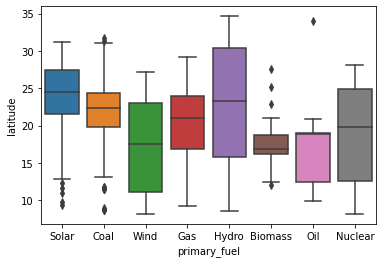

In [26]:
sns.boxplot(df['primary_fuel'],df["latitude"])

# Let's add new feature  Comission age for each plant

In [27]:
# Lets find comission age by substracting comissioning year from 2019 since 2019 is the year when data is reported.
df['Power_plant_age'] = 2019 - df['commissioning_year']



In [28]:
# now remove the feature comissioning year
df.drop(columns = 'commissioning_year',inplace = True,axis=1)

<AxesSubplot:xlabel='primary_fuel', ylabel='Power_plant_age'>

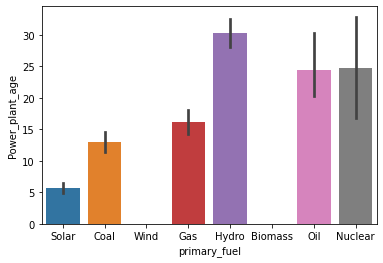

In [29]:
sns.barplot(x='primary_fuel',y='Power_plant_age',data=df)


# Let's find the oldest Power plant age

In [30]:
print('Minimum Age : ',df.Power_plant_age.min())
print('Maximum Age : ',df.Power_plant_age.max())


Minimum Age :  1.0
Maximum Age :  92.0


In [31]:
# locate the oldest powerplant
df.loc[df.Power_plant_age==92]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,92.0


SIVASAMUNDRUM is the oldest powerplant

In [32]:
# locate the youngest powerplant
df.loc[df.Power_plant_age==1]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
214,GADARWARA,800.0,22.8618,78.8648,Coal,Oil,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN,0.000000,Central Electricity Authority,1.0
346,KISHENGANGA,330.0,34.6490,74.7514,Hydro,NaN,Central Electricity Authority,WRI,NaN,NaN,NaN,1.6716,526.603750,Central Electricity Authority,1.0
418,LARA,800.0,21.7570,83.4573,Coal,Oil,Central Electricity Authority,WRI,NaN,NaN,NaN,0.0000,249.107225,Central Electricity Authority,1.0
470,MEJA STPP,660.0,25.1447,81.9415,Coal,Oil,Central Electricity Authority,WRI,NaN,NaN,NaN,0.0000,65.085350,Central Electricity Authority,1.0
577,PARE,110.0,27.2387,93.8107,Hydro,NaN,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN,345.409673,Central Electricity Authority,1.0
729,SOLAPUR STPP,1320.0,31.7537,77.2460,Coal,Oil,Central Electricity Authority,WRI,NaN,NaN,NaN,1064.0000,1604.000000,Central Electricity Authority,1.0


Youngest powerplants are :
    1. GADARWARA
    2. KISHENGANGA
    3. LARA
    4. MEJA STPP
    5. PARE
    6. SOLAPUR STPP

<AxesSubplot:xlabel='Power_plant_age', ylabel='capacity_mw'>

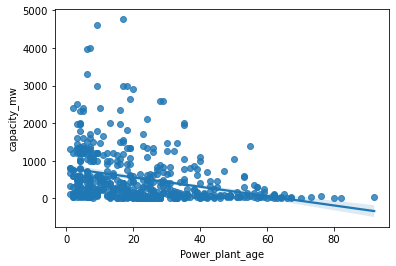

In [33]:
sns.regplot(x='Power_plant_age',y='capacity_mw',data=df)


The above plot shows that as Power_plant_age increases the capacity decreases.
Means oldest powerplants has less capacity than youngest powerplants.
It clearly shows that there is a negative linear relationship between Power_plant_age and capacity_mw.

# geolocation_source vs capacity_mw

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

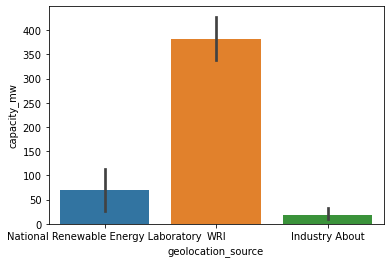

In [34]:
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)

The maximum capacity is at geolocation source WRI which is near about 350.
The lowest capacity is at geolocation source Industry About which is less than 50.

# Scatterplots

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

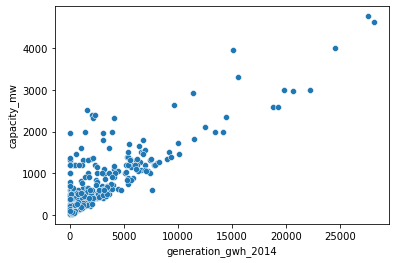

In [35]:
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

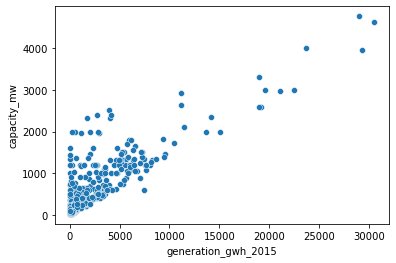

In [36]:
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

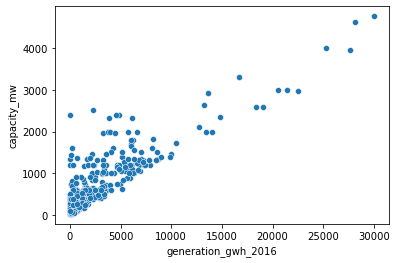

In [37]:
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

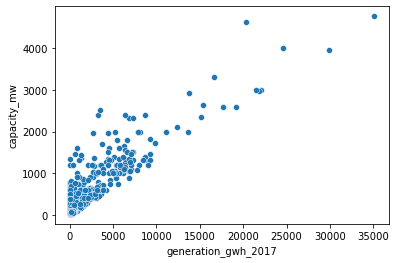

In [38]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

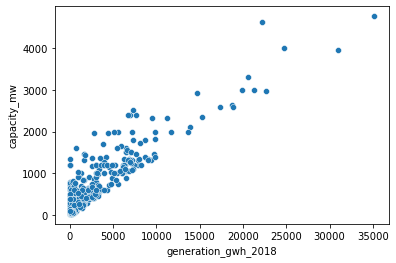

In [39]:
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',data=df)

The above scatter plots shows that there is a positive linear relationship between capacity and power generation report for given years.

# Pairplots

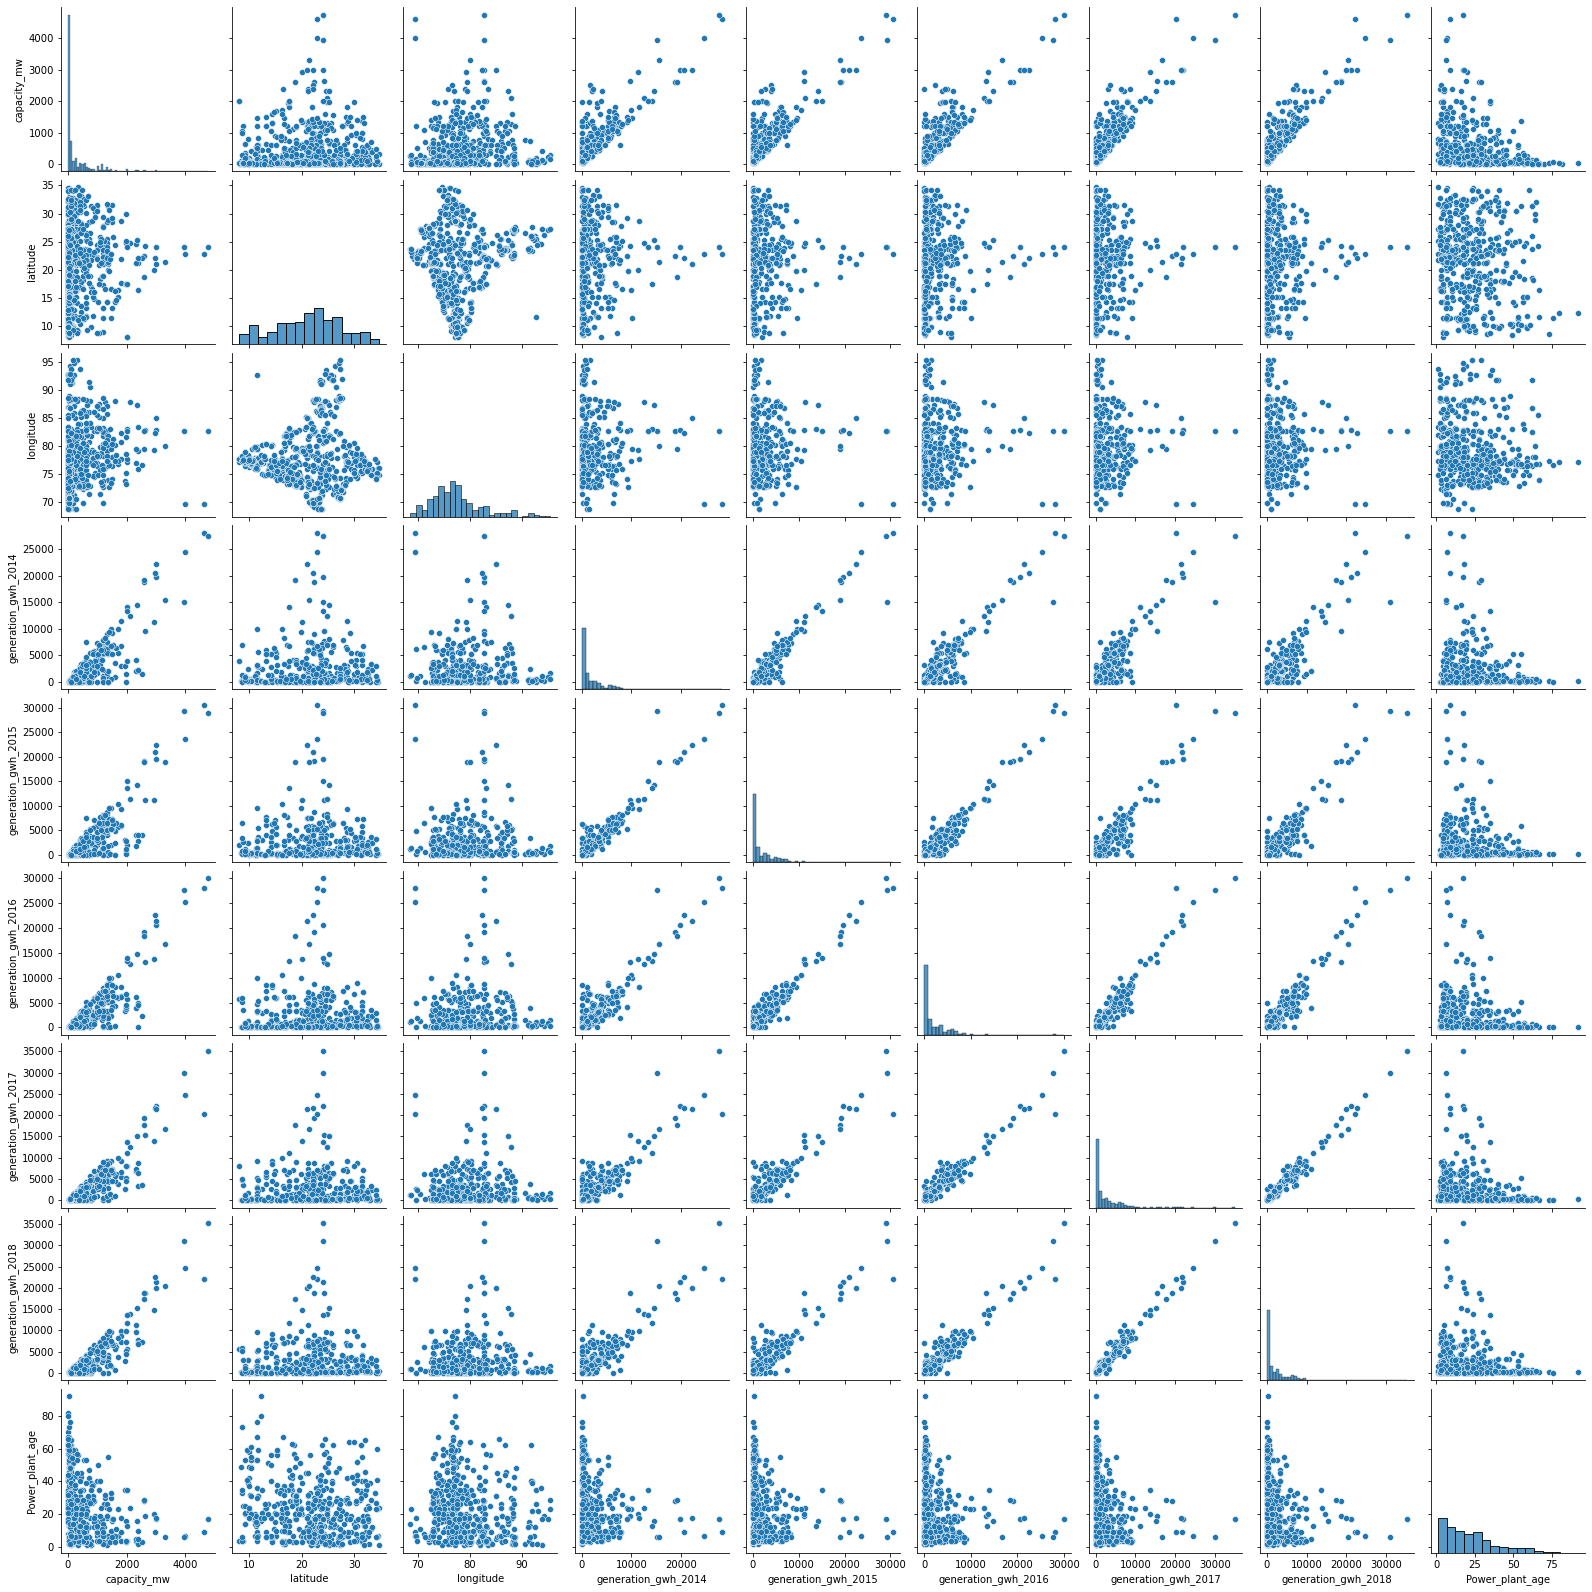

In [40]:
sns.pairplot(df)

Most of the features are strongly correlated with each other.

# Checking for Distribution of Numerical Variables

In [41]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
           'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']

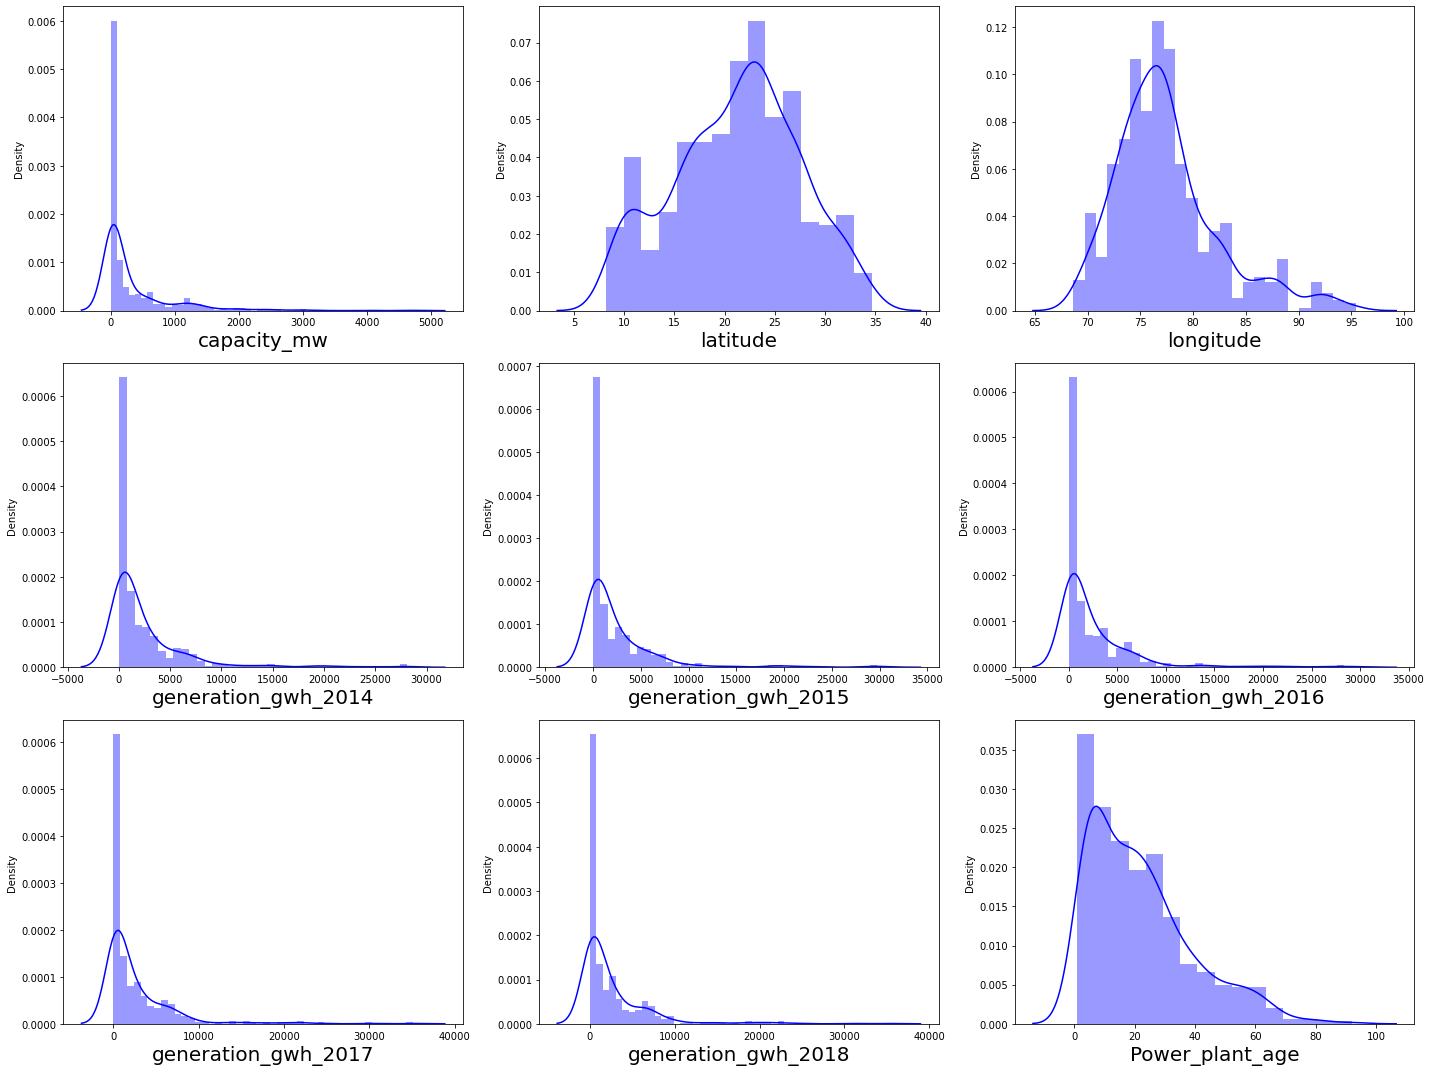

In [42]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The above distribution plots shows that only 'latitude' and 'longitude' are normally distributed.
Rest of the feature are skewed. Most of them are skewed to right since mean is greater than median.

# Outliers Detection

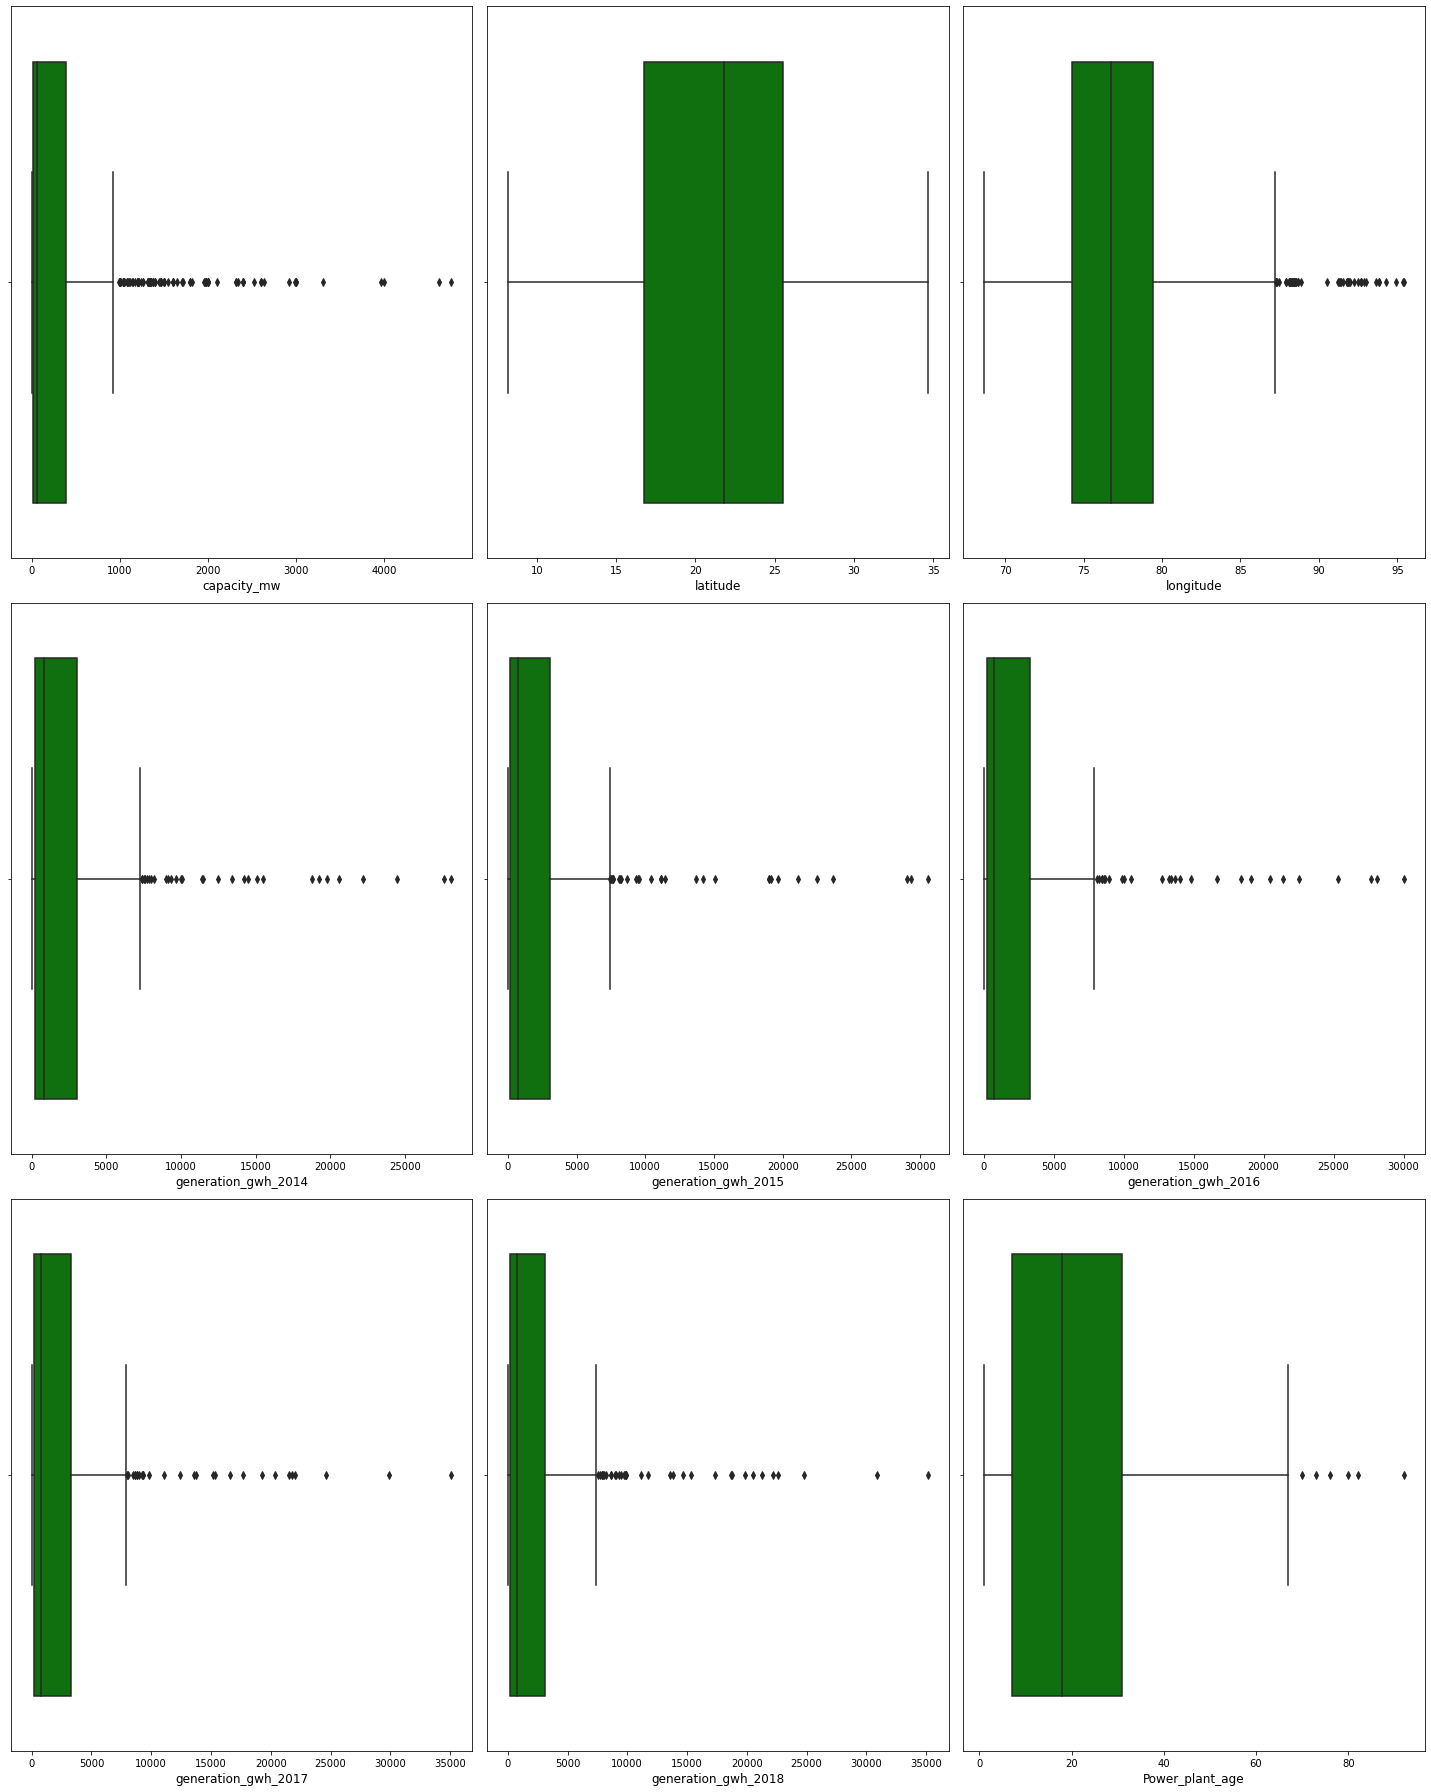

In [43]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='green')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Features with outliers are : 
    1. capacity_mw
    2. longitude
    3. generation_gwh_2014
    4. generation_gwh_2015
    5. generation_gwh_2016
    5. generation_gwh_2017
    6. generation_gwh_2018
    7. Power_plant_age

Since outliers are present only in upper capping level we will remove the outliers by quantile method.

# Imputation of Null Values

# longitude

In [44]:
# since the feature longitude contains outliers we will impute it by median.
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

# Let's check if null values are filled

In [45]:
df['longitude'].isnull().sum()
df['latitude'].isnull().sum()
df['geolocation_source'].isnull().sum()


0

Yes the NaN's are filled.

# Outliers Removal

We will use quantile based flooring and capping method to remove outliers.
Here we will take 10th percentile as flooring for lower values and 85th percentile as capping for higher values.

In [46]:
Q1 = df.quantile(0.1)
Q3 = df.quantile(0.85)
# let's define IQR
IQR = Q3-Q1

In [47]:
print(IQR)

capacity_mw             715.000000
latitude                 15.765020
longitude                 9.659540
generation_gwh_2014    5260.852500
generation_gwh_2015    5074.557695
generation_gwh_2016    5224.620405
generation_gwh_2017    5608.666190
generation_gwh_2018    5995.053935
Power_plant_age          36.000000
dtype: float64


In [48]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Percent data loss

In [49]:
df_new.shape

(875, 15)

In [50]:
percent_loss =((907-875)/907)*100
print(percent_loss)

3.528114663726571


We lost 3.52% of data while removing outliers.

Since the features 'name' and 'generation_data_source' are irrelevent for prediction we will drop these features.

In [51]:
df_new.drop(columns=['name','generation_data_source'],axis=1,inplace=True)

In [52]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,8.0
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.7745,626.239128,15.0
5,250.0,23.7689,68.6447,Coal,Oil,Central Electricity Authority,WRI,1153.421000,1208.852,1175.765000,1147.9130,976.655000,14.0


# Label Encoder

In [53]:
# lets sortout categorical features 
cat_features = ['primary_fuel','other_fuel1','source','geolocation_source']

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_features:
    df_new[i] = le.fit_transform(df_new[i])

In [55]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,108,1,NaN,NaN,NaN,NaN,NaN,8.0
1,98.0,24.7663,74.6090,1,3,173,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.7745,626.239128,15.0
5,250.0,23.7689,68.6447,1,2,22,2,1153.421000,1208.852,1175.765000,1147.9130,976.655000,14.0


# Correlation Heatmap

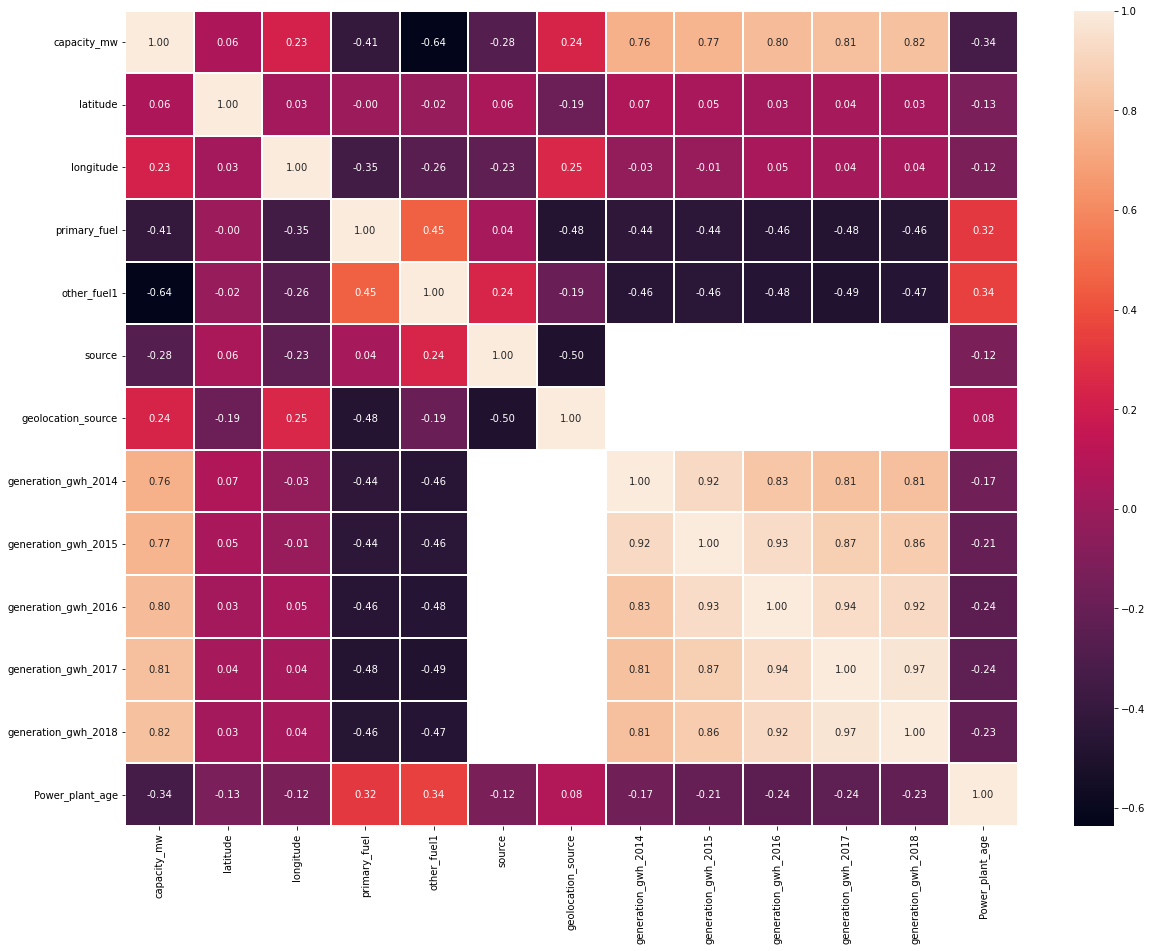

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.2,fmt='0.2f')
plt.show()

from the above heatmap we can clearly see that there is multicollinearity present between features.

# Correlation of features with target 'primary_fuel'

In [57]:
df_new.corr()["primary_fuel"].sort_values()


geolocation_source    -0.479740
generation_gwh_2017   -0.478373
generation_gwh_2018   -0.464954
generation_gwh_2016   -0.462983
generation_gwh_2015   -0.442928
generation_gwh_2014   -0.437678
capacity_mw           -0.411666
longitude             -0.346175
latitude              -0.001633
source                 0.038591
Power_plant_age        0.320769
other_fuel1            0.451611
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

In [58]:
df_new.corr()["capacity_mw"].sort_values()


other_fuel1           -0.637050
primary_fuel          -0.411666
Power_plant_age       -0.337372
source                -0.278435
latitude               0.061117
longitude              0.225936
geolocation_source     0.235932
generation_gwh_2014    0.755399
generation_gwh_2015    0.767392
generation_gwh_2016    0.801195
generation_gwh_2017    0.811706
generation_gwh_2018    0.817318
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

# Skewness

In [59]:
df_new.skew()

capacity_mw            1.928986
latitude              -0.130634
longitude              1.227618
primary_fuel           0.422189
other_fuel1           -1.849711
source                 1.778783
geolocation_source    -2.099209
generation_gwh_2014    1.633097
generation_gwh_2015    1.570080
generation_gwh_2016    1.628818
generation_gwh_2017    1.518951
generation_gwh_2018    1.550841
Power_plant_age        1.025714
dtype: float64

In [60]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [61]:
df_new[skew] = scaler.fit_transform(df_new[skew].values)
df_new[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.931123,0.491054,NaN,NaN,NaN,NaN,NaN,-0.821890
1,-0.513864,0.491054,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.415139,0.491054,NaN,NaN,NaN,NaN,NaN,NaN
3,2.164454,0.491054,-0.108366,0.117891,0.142813,-0.035671,-0.064700,-0.188935
5,-2.756195,-2.036043,0.253343,0.326892,0.307859,0.270974,0.176703,-0.264442


In [62]:
df_new.skew()

capacity_mw            1.928986
latitude              -0.130634
longitude              0.000382
primary_fuel           0.422189
other_fuel1           -1.548039
source                 1.778783
geolocation_source    -2.099209
generation_gwh_2014   -0.132426
generation_gwh_2015   -0.140366
generation_gwh_2016   -0.134526
generation_gwh_2017   -0.153398
generation_gwh_2018   -0.158097
Power_plant_age       -0.059696
dtype: float64

Since feature 'other_fuel1' is having less correlation and maximum missing values we will drop it.

In [63]:
df_new.drop(columns='other_fuel1',inplace = True,axis=1)

# Let's check for NaN's once for new column 'Power_plant_age'

In [64]:
df_new['Power_plant_age'] = df_new['Power_plant_age'].fillna(df_new['Power_plant_age'].mean())

Since we can not fill NaN's for generation_gwh we will drop those columns and proceed for next

In [65]:
df_new.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1, inplace = True)



In [66]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,Power_plant_age
0,2.5,28.1839,-0.931123,6,108,1,-8.218905e-01
1,98.0,24.7663,-0.513864,1,173,2,2.395038e-16
2,39.2,21.9038,-2.415139,7,21,2,2.395038e-16
3,135.0,23.8712,2.164454,2,22,2,-1.889349e-01
5,250.0,23.7689,-2.756195,1,22,2,-2.644425e-01


# Split data intp target & Features

In [67]:
y = df_new['primary_fuel']
X = df_new.drop(['primary_fuel'], axis =1)

# Checking for MultiCollinearity

In [68]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [69]:
corr_features = correlation(X,0.85)
len(set(corr_features))

0

No MultiCollinearity present

# Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
sc = StandardScaler()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 75)


In [71]:
x_train.shape,x_test.shape

((612, 6), (263, 6))

In [72]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# finding best random state

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6197718631178707 on Random_state 807


# Logistic Regression Model

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=807, test_size=0.3)

In [76]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [77]:
accuracy_score_lr = accuracy_score(y_test,y_pred_lr)

In [78]:
print("accuracy_score_lr : ",accuracy_score(y_test,y_pred_lr))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_lr))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_lr))

accuracy_score_lr :  0.6197718631178707


confusion_matrix

 :  [[ 4  0  0  4  0  0  7  0]
 [ 3 43  0 11  0  0  6  0]
 [ 0 17  0  4  0  0  2  0]
 [ 0 12  0 76  0  0  0  5]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  3  0  0  1  0]
 [ 0  2  0  3  0  0 29  0]
 [ 0  2  0 15  0  0  0 11]]


classification_report

 :                precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.55      0.68      0.61        63
           2       0.00      0.00      0.00        23
           3       0.65      0.82      0.72        93
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.64      0.85      0.73        34
           7       0.69      0.39      0.50        28

    accuracy                           0.62       263
   macro avg       0.39      0.38      0.37       263
weighted avg       0.55      0.62      0.57       263



# RandomForestClassifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
y_pred_rf = rf.predict(x_test)

In [81]:
accuracy_score_rf = accuracy_score(y_test,y_pred_rf)

In [82]:
print("accuracy_score_rf : ",accuracy_score(y_test,y_pred_rf))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_rf))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_rf))

accuracy_score_rf :  0.8288973384030418


confusion_matrix

 :  [[ 9  6  0  0  0  0  0  0]
 [ 1 54  3  5  0  0  0  0]
 [ 0  9  9  3  0  2  0  0]
 [ 0  8  3 82  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 28]]


classification_report

 :                precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.68      0.86      0.76        63
           2       0.60      0.39      0.47        23
           3       0.88      0.88      0.88        93
           4       0.00      0.00      0.00         2
           5       0.50      0.40      0.44         5
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        28

    accuracy                           0.83       263
   macro avg       0.70      0.64      0.66       263
weighted avg       0.82      0.83      0.82       263



# Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred_dt = dt.predict(x_test)

In [85]:
accuracy_score_dt = accuracy_score(y_test,y_pred_dt)

In [86]:
print("accuracy_score_dt : ",accuracy_score(y_test,y_pred_dt))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_dt))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_dt))

accuracy_score_dt :  0.7452471482889734


confusion_matrix

 :  [[10  4  1  0  0  0  0  0]
 [ 0 46  8  8  0  1  0  0]
 [ 0  9  9  3  0  2  0  0]
 [ 0 10 10 68  0  5  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  1  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 28]]


classification_report

 :                precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.64      0.73      0.68        63
           2       0.32      0.39      0.35        23
           3       0.83      0.73      0.78        93
           4       0.00      0.00      0.00         2
           5       0.20      0.40      0.27         5
           6       1.00      0.97      0.99        34
           7       1.00      1.00      1.00        28

    accuracy                           0.75       263
   macro avg       0.62      0.61      0.61       263
weighted avg       0.77      0.75      0.75       263



# KNeighborsClassifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [88]:
y_pred_knn = knn.predict(x_test)

In [89]:
accuracy_score_knn = accuracy_score(y_test,y_pred_knn)

In [90]:
print("accuracy_score_knn : ",accuracy_score(y_test,y_pred_knn))
print("\n\nconfusion_matrix\n\n : ",confusion_matrix(y_test,y_pred_knn))
print("\n\nclassification_report\n\n : ",classification_report(y_test,y_pred_knn))

accuracy_score_knn :  0.6007604562737643


confusion_matrix

 :  [[ 8  3  0  1  0  0  2  1]
 [ 1 46  1  8  0  0  4  3]
 [ 0 10  3  6  1  1  1  1]
 [ 0 16  2 59  0  0  0 16]
 [ 0  1  0  1  0  0  0  0]
 [ 1  0  0  2  0  0  0  2]
 [ 2  6  1  1  0  0 23  1]
 [ 0  0  0  9  0  0  0 19]]


classification_report

 :                precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.56      0.73      0.63        63
           2       0.43      0.13      0.20        23
           3       0.68      0.63      0.66        93
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.77      0.68      0.72        34
           7       0.44      0.68      0.54        28

    accuracy                           0.60       263
   macro avg       0.44      0.42      0.42       263
weighted avg       0.60      0.60      0.58       263



# Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score

# 1. Logistic Regression

In [92]:
cv_score_lr = cross_val_score(LogisticRegression(),X,y,cv=10).mean()
cv_score_lr

0.5257706374085684

# 2.RandomForestClassifier

In [93]:
cv_score_rf = cross_val_score(RandomForestClassifier(),X,y,cv=10).mean()
cv_score_rf

0.8490726227795193

# 3. DecisionTreeClassifier

In [94]:
cv_score_dt = cross_val_score(DecisionTreeClassifier(),X,y,cv=10).mean()
cv_score_dt

0.7771682340647857

# 4. KNeighborsClassifier

In [95]:
cv_score_knn = cross_val_score(KNeighborsClassifier(),X,y,cv=10).mean()
cv_score_knn

0.6070010449320794

# Result

In [96]:
result = pd.DataFrame({'Model Name':['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier'],
                       'Accuracy Score' : [accuracy_score_lr,accuracy_score_rf,accuracy_score_dt,accuracy_score_knn],
                       'Cross Validation SCore' : [cv_score_lr,cv_score_rf,cv_score_dt,cv_score_knn]})
result

,Model Name,Accuracy Score,Cross Validation SCore
0,LogisticRegression,0.619772,0.525771
1,RandomForestClassifier,0.828897,0.849073
2,DecisionTreeClassifier,0.745247,0.777168
3,KNeighborsClassifier,0.600760,0.607001


Since the model RandomForestClassifier gives us best accuracy with minimun difference between model accuracy score and cross validation score, we will choose RandomForestClassifier as a final model

# Let's apply Hyperparameter Tuning to this model

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
n_estimators = [5,7,10,15,25,30]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [1,4]
min_samples_split = [1,5]
min_samples_leaf = [2,6]
bootstrap = ['true','false']

In [99]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [100]:
clf1 = GridSearchCV(rf,param_grid = param_grid,cv = 10,verbose = True,n_jobs = -1)

In [101]:
best_clf1 = clf1.fit(X,y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [102]:
best_clf1.best_estimator_

RandomForestClassifier(bootstrap='false', max_depth=4, max_features='auto',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=25)

In [103]:
param_accuracy_rf = round(best_clf1.score(X,y),3)
param_accuracy_rf

0.809

# Model Saving

In [104]:
import pickle

In [105]:
filename = "GlobalPowerPlantPrimaryFuel"
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [106]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

82.88973384030417


In [107]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred_rf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262
Predicted,3,6,0,3,2,1,6,1,3,3,1,7,1,1,3,0,1,1,3,0,6,2,7,1,5,3,7,1,3,6,1,3,6,3,7,3,1,7,2,3,5,2,3,3,6,1,7,3,2,3,1,3,7,3,1,2,3,0,1,7,3,0,2,3,1,7,1,3,1,7,3,3,3,3,3,6,7,1,1,3,3,3,1,3,6,7,3,0,6,1,3,7,3,6,3,1,1,7,3,3,3,3,1,0,7,3,3,3,6,3,1,1,1,1,1,1,7,1,1,1,2,1,3,0,1,1,1,1,7,1,2,3,6,6,1,5,1,7,7,1,3,3,7,3,1,6,3,3,6,6,6,6,3,0,1,1,7,3,1,6,6,3,5,3,1,3,1,3,6,1,3,2,3,2,1,1,6,3,1,3,2,7,3,1,3,3,6,3,3,3,1,7,1,7,3,6,6,1,6,3,3,1,1,1,3,1,3,6,3,1,1,6,3,1,3,6,3,6,1,7,1,3,1,3,1,2,1,3,1,6,1,3,3,3,3,1,0,3,1,3,1,7,3,2,1,1,6,7,3,3,3,6,6,3,2,7,1,3,3,3,3,1,1
Original,3,6,0,3,2,1,6,1,3,3,1,7,1,1,3,0,1,1,3,0,6,2,7,1,5,3,7,1,3,6,1,3,6,3,7,3,1,7,2,3,5,2,3,3,6,1,7,3,2,3,1,3,7,3,1,2,3,0,1,7,3,0,2,3,1,7,1,3,1,7,3,3,3,3,3,6,7,1,1,3,3,3,1,3,6,7,3,0,6,1,3,7,3,6,3,1,1,7,3,3,3,3,1,0,7,3,3,3,6,3,1,1,1,1,1,1,7,1,1,1,2,1,3,0,1,1,1,1,7,1,2,3,6,6,1,5,1,7,7,1,3,3,7,3,1,6,3,3,6,6,6,6,3,0,1,1,7,3,1,6,6,3,5,3,1,3,1,3,6,1,3,2,3,2,1,1,6,3,1,3,2,7,3,1,3,3,6,3,3,3,1,7,1,7,3,6,6,1,6,3,3,1,1,1,3,1,3,6,3,1,1,6,3,1,3,6,3,6,1,7,1,3,1,3,1,2,1,3,1,6,1,3,3,3,3,1,0,3,1,3,1,7,3,2,1,1,6,7,3,3,3,6,6,3,2,7,1,3,3,3,3,1,1


# capacity_mw prediction

In [108]:


from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



In [109]:
df_new.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,Power_plant_age
0,2.5,28.1839,-0.931123,6,108,1,-8.218905e-01
1,98.0,24.7663,-0.513864,1,173,2,2.395038e-16
2,39.2,21.9038,-2.415139,7,21,2,2.395038e-16
3,135.0,23.8712,2.164454,2,22,2,-1.889349e-01
5,250.0,23.7689,-2.756195,1,22,2,-2.644425e-01


In [110]:
y = df_new['capacity_mw']
X = df_new.drop(['capacity_mw'], axis =1)

# Checking for MultiCollinearity

In [111]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [112]:
corr_features = correlation(X,0.85)
len(set(corr_features))

0

No MultiCollinearity present

# Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
sc = StandardScaler()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 75)


In [114]:
x_train.shape,x_test.shape

((612, 6), (263, 6))

In [115]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=807, test_size=.33)


# LinearRegression

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.39515327327458283 on Random_state 59


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=59, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_train,y_train)
y_pred_linreg=lin_reg.predict(x_test)

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error :', mean_absolute_error(y_test,y_pred_linreg))
print('Mean squared error :', mean_squared_error(y_test,y_pred_linreg))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred_linreg)))
print('\n')
from sklearn.metrics import r2_score

r2_score_linreg = r2_score(y_test,y_pred_linreg,multioutput='variance_weighted')

r2_score_linreg

Mean absolute error : 190.15537224571278
Mean squared error : 82467.29432571957
Root Mean Squared Error: 287.1711934120823




0.37577195002928676

# RandomForestRegressor

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=59, test_size=.3)
rf.fit(x_train,y_train)


RandomForestRegressor()

In [121]:
rf.score(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error :', mean_absolute_error(y_test,y_pred_rf))
print('Mean squared error :', mean_squared_error(y_test,y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('\n')
from sklearn.metrics import r2_score

r2_score_rf = r2_score(y_test,y_pred_rf,multioutput='variance_weighted')

r2_score_rf

Mean absolute error : 164.4479283019405
Mean squared error : 74649.5344366044
Root Mean Squared Error: 273.2206698560788




0.4349477123799578

# DecisionTreeRegressor

In [123]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=59, test_size=.3)
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [124]:
dt.score(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error :', mean_absolute_error(y_test,y_pred_dt))
print('Mean squared error :', mean_squared_error(y_test,y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print('\n')
from sklearn.metrics import r2_score

r2_score_dt = r2_score(y_test,y_pred_dt,multioutput='variance_weighted')

r2_score_dt

Mean absolute error : 207.4323041825095
Mean squared error : 140998.19191412927
Root Mean Squared Error: 375.49725952945283




-0.06727190588213006

# KNeighborsRegressor

In [126]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=59, test_size=.3)
knn.fit(x_train,y_train)


KNeighborsRegressor()

In [127]:
knn.score(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error :', mean_absolute_error(y_test,y_pred_knn))
print('Mean squared error :', mean_squared_error(y_test,y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print('\n')
from sklearn.metrics import r2_score

r2_score_knn = r2_score(y_test,y_pred_knn,multioutput='variance_weighted')

r2_score_knn

Mean absolute error : 177.40757870722433
Mean squared error : 79835.19626311847
Root Mean Squared Error: 282.55122767936876




0.39569535668865563

#   GradientBoostingRegressor


In [129]:
from sklearn.ensemble import  GradientBoostingRegressor

gbr = GradientBoostingRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=59, test_size=.3)
gbr.fit(x_train,y_train)


gbr.score(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error :', mean_absolute_error(y_test,y_pred_gbr))
print('Mean squared error :', mean_squared_error(y_test,y_pred_gbr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred_gbr)))
print('\n')
from sklearn.metrics import r2_score

r2_score_gbr = r2_score(y_test,y_pred_gbr,multioutput='variance_weighted')

r2_score_gbr

Mean absolute error : 161.72582129806557
Mean squared error : 71285.37673092943
Root Mean Squared Error: 266.9932147657117




0.46041237229850795

# AdaBoostRegressor

In [130]:
from sklearn.ensemble import AdaBoostRegressor


In [131]:


adb = AdaBoostRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=59, test_size=.3)
adb.fit(x_train,y_train)


adb.score(x_train,y_train)
y_pred_adb=adb.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error :', mean_absolute_error(y_test,y_pred_adb))
print('Mean squared error :', mean_squared_error(y_test,y_pred_adb))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred_adb)))
print('\n')
from sklearn.metrics import r2_score

r2_score_adb = r2_score(y_test,y_pred_adb,multioutput='variance_weighted')

r2_score_adb

Mean absolute error : 183.93934450395895
Mean squared error : 71968.11310065363
Root Mean Squared Error: 268.26873299110656




0.45524446669178664

# Cross Validation

# 1.RandomForestRegressor

In [132]:
cv_score_rf = cross_val_score(RandomForestRegressor(),X,y,cv=5).mean()
cv_score_rf

0.5169942437336721

# 2. DecisionTreeRegressor

In [133]:
cv_score_dt = cross_val_score(DecisionTreeRegressor(),X,y,cv=5).mean()
cv_score_dt

0.2615258788725889

# 3. KNeighborsRegressor

In [134]:
cv_score_knn = cross_val_score(KNeighborsRegressor(),X,y,cv=5).mean()
cv_score_knn

0.4166229248072402

# 4. GradientBoostingRegressor

In [135]:
cv_score_gbr = cross_val_score(GradientBoostingRegressor(),X,y,cv=5).mean()
cv_score_gbr

0.468672124422972

# 5. AdaBoostRegressor

In [136]:
cv_score_adb = cross_val_score(AdaBoostRegressor(),X,y,cv=5).mean()
cv_score_adb

0.42518695639905363

Among all the models the KNeighborsRegressor model gives us better R_ score with minimun value of Root Mean Squared Error.
We will select this model as final model.

# Hyperparameter Tuning

In [137]:
k = np.random.randint(0,50,20)

In [138]:
params = {'n_neighbors' : k}

In [139]:
clf = GridSearchCV(knn,params,cv=5,verbose = True,n_jobs=-1)

In [140]:
best_clf = clf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [141]:
best_clf.best_estimator_

KNeighborsRegressor(n_neighbors=8)

In [142]:
param_accuracy_knn = round(best_clf.score(X,y),3)
param_accuracy_knn

0.584

# Model Saving

In [143]:
import pickle

In [144]:
filename = "GlobalPowerPlantCapacity-MW"
pickle.dump(knn,open(filename,'wb'))

# Conclusion

In [145]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

39.56953566886556


In [146]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred_knn[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262
Predicted,311.0,133.7,20.01,158.0,447.0,172.8,7.2,35.94,36.87,35.94,446.56,481.5,19.0,790.858,67.86,151.8,79.6,39.7,32.0,284.7132,131.34,628.4,37.72,575.32,641.2,466.2732,547.0,23.7,33.0,36.87,1240.0,572.6,479.3172,23.8,708.5,396.06,11.9,106.4,48.6,152.84,59.07,410.86,883.0,195.191,64.4,13.94,37.7,115.3,1114.0,89.98,86.9,2.6,627.6,19.0,22.4,899.4142,39.06,6.0,1154.0,302.6,745.7002,13.66,332.6,444.98,41.24,642.6,720.0,9.36,67.52,38.8,364.1132,38.25,47.5,2.6,7.1,224.8,188.4,1004.0,947.0,14.68,22.4,20.6,750.1,388.0,162.07,6.0,211.0,9.16,770.286,228.8,674.714,105.8,479.3172,116.0,706.5,427.28,576.4,83.4,36.87,1004.0,37.8,11.9,130.1,45.7,20.6,37.72,13.0,322.6,9.36,146.6,20.01,2.6,928.0,708.5,49.2,6.0,906.0,1240.0,49.56,72.58,46.2,42.75,68.64,27.94,730.0,198.2,674.714,17.24,699.62,823.0,19.0,31.85,76.38,28.12,29.4,20.6,168.136,699.0,6.2,490.0,1388.0,1065.6,567.0,755.2722,11.9,418.0,32.82,443.3,48.6,28.12,50.36,134.96,219.2,26.6,32.44,33.64,418.0,66.44,770.286,31.0,28.0,24.4,6.0,72.58,19.78,345.5968,19.0,63.24,9.32,1388.0,709.0,150.08,788.0,561.6,630.0,511.44,266.72,28.12,322.6,46.22,20.64,97.0,110.88,29.22,66.44,16.1,602.06,19.0,57.72,53.0,39.7,680.06,69.8,680.06,134.0,29.0,50.1,19.3,535.0,38.8,49.0,166.3,45.02,7.1,651.0,65.0,185.24,4.4,33.0,310.0,416.5,223.676,86.0,8.32,6.0,575.914,46.2,13.66,28.12,20.01,266.72,273.56,185.24,28.12,682.956,83.34,781.0,89.52,547.0,16.43,110.88,187.36,17.32,93.0,78.92,35.94,1136.0,654.5,22.8,40.4,21.03,66.52,68.24,295.6,47.4,74.028,19.78,919.1,70.2,31.2,189.6,248.8,22.8,1114.0,66.0,36.87,1030.0,119.28,614.8,47.5,486.0,794.4,332.6
Original,311.0,133.7,20.01,158.0,447.0,172.8,7.2,35.94,36.87,35.94,446.56,481.5,19.0,790.858,67.86,151.8,79.6,39.7,32.0,284.7132,131.34,628.4,37.72,575.32,641.2,466.2732,547.0,23.7,33.0,36.87,1240.0,572.6,479.3172,23.8,708.5,396.06,11.9,106.4,48.6,152.84,59.07,410.86,883.0,195.191,64.4,13.94,37.7,115.3,1114.0,89.98,86.9,2.6,627.6,19.0,22.4,899.4142,39.06,6.0,1154.0,302.6,745.7002,13.66,332.6,444.98,41.24,642.6,720.0,9.36,67.52,38.8,364.1132,38.25,47.5,2.6,7.1,224.8,188.4,1004.0,947.0,14.68,22.4,20.6,750.1,388.0,162.07,6.0,211.0,9.16,770.286,228.8,674.714,105.8,479.3172,116.0,706.5,427.28,576.4,83.4,36.87,1004.0,37.8,11.9,130.1,45.7,20.6,37.72,13.0,322.6,9.36,146.6,20.01,2.6,928.0,708.5,49.2,6.0,906.0,1240.0,49.56,72.58,46.2,42.75,68.64,27.94,730.0,198.2,674.714,17.24,699.62,823.0,19.0,31.85,76.38,28.12,29.4,20.6,168.136,699.0,6.2,490.0,1388.0,1065.6,567.0,755.2722,11.9,418.0,32.82,443.3,48.6,28.12,50.36,134.96,219.2,26.6,32.44,33.64,418.0,66.44,770.286,31.0,28.0,24.4,6.0,72.58,19.78,345.5968,19.0,63.24,9.32,1388.0,709.0,150.08,788.0,561.6,630.0,511.44,266.72,28.12,322.6,46.22,20.64,97.0,110.88,29.22,66.44,16.1,602.06,19.0,57.72,53.0,39.7,680.06,69.8,680.06,134.0,29.0,50.1,19.3,535.0,38.8,49.0,166.3,45.02,7.1,651.0,65.0,185.24,4.4,33.0,310.0,416.5,223.676,86.0,8.32,6.0,575.914,46.2,13.66,28.12,20.01,266.72,273.56,185.24,28.12,682.956,83.34,781.0,89.52,547.0,16.43,110.88,187.36,17.32,93.0,78.92,35.94,1136.0,654.5,22.8,40.4,21.03,66.52,68.24,295.6,47.4,7